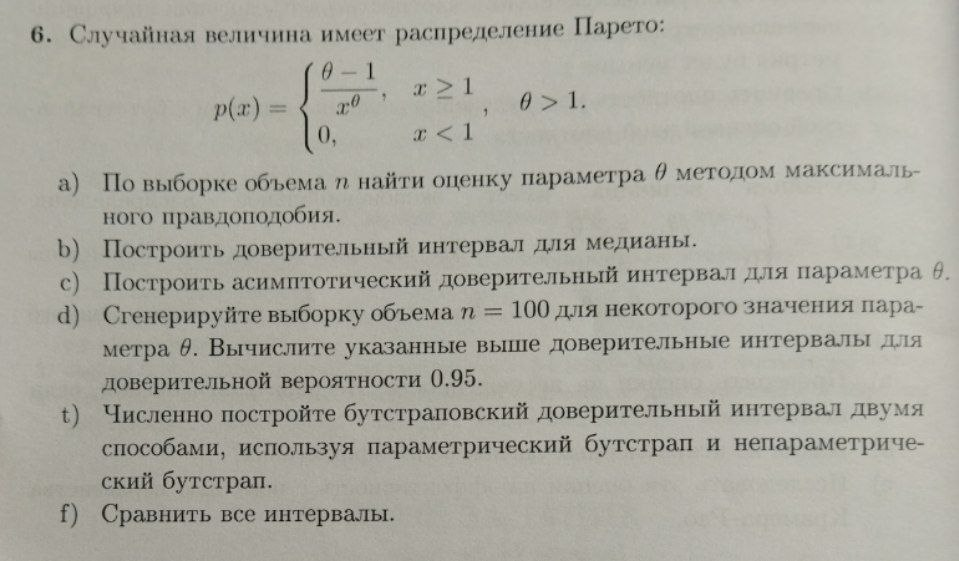

In [57]:
from IPython.display import Image

Image("images/task_6.jpg")

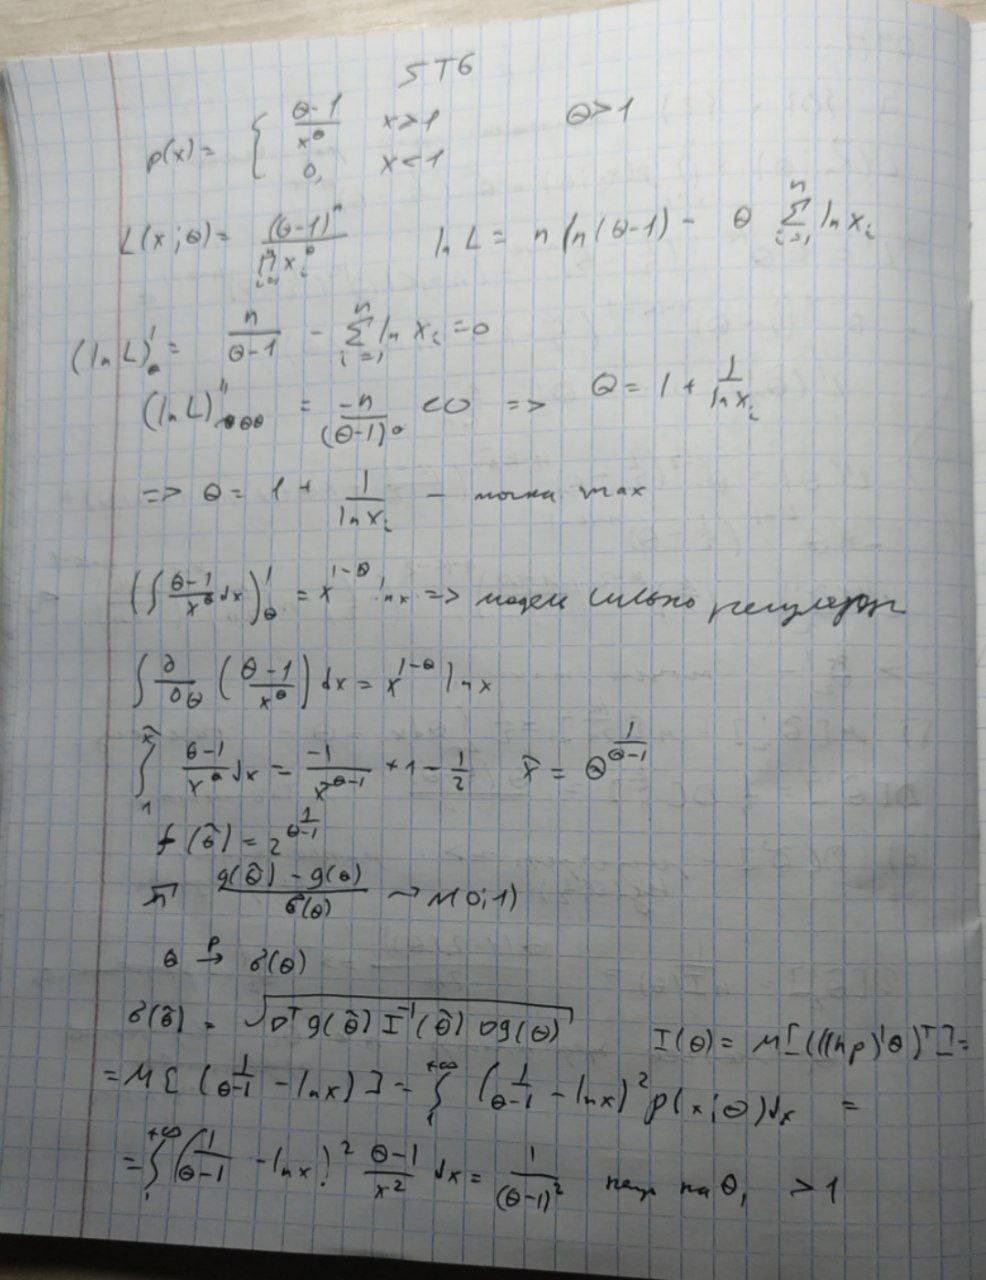

In [58]:
Image("images/answer_6_1.jpg")

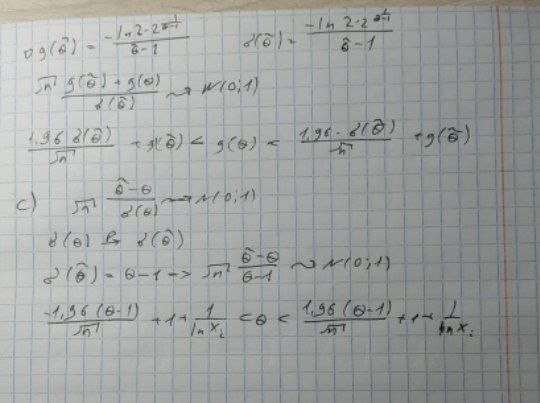

In [59]:
Image("images/answer_6_2.jpg")

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

theta = 4.5

def p(x):
    return (theta - 1) / x ** theta if x >= 0 else 0

def F(x):
    if x >= 0:
        return (1 - x ** (1 - theta))
    else:
        return 0

def F_reversed(y):
    return (1 - y) ** (1 / (1 - theta))

def g(theta):
    return 2 ** (1 / (theta - 1))

# Размер генерируемой выборки
n = 100
sample = []
for i in range(n):
    sample.append(float(F_reversed(random.random())))

***d)***

In [61]:
t_1 = -1.96
t_2 = 1.96
beta = 0.95
estimation = 1 + 1 / np.mean([np.log(x) for x in sample])

med_l = g(estimation) - (t_2 * np.log(2) * g(estimation)) / ((estimation - 1) * np.sqrt(n)) 
med_r = g(estimation) - (t_1 * np.log(2) * g(estimation)) / ((estimation - 1) * np.sqrt(n)) 
print(f'Интервал медианы = ({med_l}, {med_r})')
print('l =',  med_r - med_l)
print("Медиана =", (sorted(sample)[n//2-1] + sorted(sample)[n//2]) / 2)

assmp_l = estimation - ((estimation - 1) * t_2) / np.sqrt(n)
assmp_r = estimation -  ((estimation - 1) * t_1) / np.sqrt(n)
print(f'Асимптотический интервал = ({assmp_l}, {assmp_r})')
print('l =',  assmp_r - assmp_l)

Интервал медианы = (1.205797525837513, 1.2360042117022139)
l = 0.030206685864700766
Медиана = 1.213717565836542
Асимптотический интервал = (4.257621725378534, 4.68812347290405)
l = 0.4305017475255166


***t)***

In [ ]:
n_bt = 1000
estimation = 1 + 1 / np.mean([np.log(x) for x in sample])

delta = []
for i in range(n_bt):
    best_sample = np.random.choice(sample, size=len(sample), replace=True)
    theta = 1 + 1 / np.mean([np.log(x) for x in best_sample])
    delta.append(theta - estimation)

delta.sort()
t_1 = delta[int(n_bt * (1 - beta) / 2)]
t_2 = delta[int(n_bt * (1 + beta) / 2)]
param_r = -(t_1 - estimation)
param_l = -(t_2 - estimation)
print(f'Параметрический интервал = ({param_l}, {param_r})')
print('l =',  param_r - param_l)

def F_reversed(y, theta_w):
    return (1 - y) ** (1 / (1 - theta_w))

n_bt = 50000
for i in range(n_bt):
    best_sample = [F_reversed(random.random(), estimation) for _ in range(n)]
    theta = 1 + 1 / np.mean([np.log(x) for x in best_sample])
    delta.append(theta - estimation)

delta.sort()
t_1 = delta[int(n_bt * (1 - beta) / 2)]
t_2 = delta[int(n_bt * (1 + beta) / 2)]
n_param_r = -(t_1 - estimation)
n_param_l = -(t_2 - estimation)
print(f'Непараметрический интервал = ({n_param_l}, {n_param_r})')
print('l =',  n_param_r - n_param_l)

Параметрический интервал = (4.232324143828595, 4.678543676040947)
l = 0.44621953221235255
Непараметрический интервал = (4.276608238480916, 4.6769701326411655)
l = 0.40036189416024914


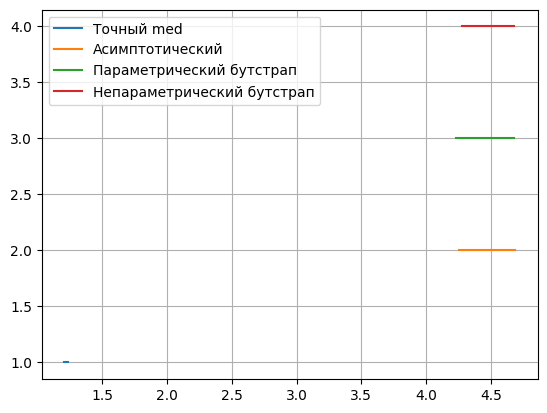

In [63]:
x1 = np.linspace(med_l, med_r, 2)
y1 = [1] * 2

x2 = np.linspace(assmp_l, assmp_r, 2)
y2 = [2] * 2

x3 = np.linspace(param_l, param_r, 2)
y3 = [3] * 2

x4 = np.linspace(n_param_l, n_param_r, 2)
y4 = [4] * 2

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.grid("on")

plt.legend(["Точный med", "Асимптотический", "Параметрический бутстрап", "Непараметрический бутстрап"])
plt.show()